## US Visa Prediction Project

**Life cycle of Machine learning Project**
- Understanding the Problem Statement
- Data Collection
- Exploratory data analysis
- Data Cleaning
- Data Pre-Processing
- Model Training
- Choose best model

### About

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on working place and maintain requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

### 1. Problem statement.

- OFLC gives job certification applications for employers seeking to bring foreign workers into the United States and grants certifications.
- As In last year the count of employees were huge so OFLC needs Machine learning models to shortlist visa applicants based on their previous data.

**In this project we are going to use the data given to build a Classification model:**

- This model is to check if Visa get approved or not based on the given dataset.
- This can be used to Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain criteria which influences the decision.

### 2. Data Collection.

- The Dataset is part of Office of Foreign Labor Certification (OFLC)
- The data consists of 25480 Rows and 12 Columns

`Dataset Link` - https://www.kaggle.com/datasets/moro23/easyvisa-dataset

#### 2.1 Import Data and Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Import the CSV data into a Pandas DataFrame.**

In [2]:
df = pd.read_csv(r'Visadataset.csv')
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**Shape of the dataset**

In [3]:
df.shape

(25480, 12)

**Statistical summary of dataframe**

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


**Check Datatypes in the dataset**

In [5]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


### 3. EXPLORING DATASET

In [6]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

We have 9 categorical features : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [7]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
---------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
---------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
---------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
---------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
---------------------------
region_of_employment
Northeast    2

**Some meaningful insights:**

1. **Continent Representation**:
    - **Asia** leads with **66.17%**, suggesting a significant portion of employees are from Asia.
    - **Europe** and **North America** follow with **14.65%** and **12.92%** respectively, indicating these regions have moderate representation.
    - **South America** and **Africa** are less represented with **3.34%** and **2.16%**.
    - **Oceania** is the least represented at **0.75%**.

2. **Education Level**:
    - A large proportion of employees hold a **Bachelor's degree (40.16%)** and **Master's degree (37.81%)**.
    - A smaller fraction have a **High School education (13.42%)** and **Doctorate (8.60%)**.

3. **Job Experience**:
    - **58.09%** of employees have job experience, while **41.91%** do not, indicating a slightly higher preference for experienced individuals.

4. **Job Training Requirement**:
    - A vast majority of positions **(88.40%)** do not require job training, while **11.60%** do, suggesting that most roles might prioritize skills and qualifications over training.

5. **Region of Employment**:
    - **Northeast (28.24%)**, **South (27.54%)**, and **West (25.85%)** are the top regions of employment.
    - **Midwest** holds **16.90%**, and **Island regions** have **1.47%**, reflecting where employment is concentrated.

6. **Unit of Wage**:
    - Most wages are provided on a **yearly basis (90.12%)**, followed by **hourly (8.47%)**, **weekly (1.07%)**, and **monthly (0.35%)** rates.

7. **Full-Time Position**:
    - An overwhelming majority of positions **(89.38%)** are full-time, with only **10.62%** being part-time.

8. **Case Status**:
    - **66.79%** of cases are **certified**, while **33.21%** are **denied**, indicating a majority of applications are successful.

**Summary**:
This data suggests that most employees come from Asia, hold a Bachelor's or Master's degree, have job experience, and do not require additional job training. Employment is predominantly in the Northeast, South, and West regions, with wages mostly given on a yearly basis and full-time positions being the norm. Additionally, the majority of cases are certified, indicating a high success rate for applications.

### Univariate Analysis
- The analysis of a single variable is referred to as `Univariate Analysis`. The word "uni" signifies "one." Understanding the distribution of values for a single variable is the aim of univariate analysis.

**Other Type of Analysis are:**

- **Bivariate Analysis:** The analysis of two variables.
- **Multivariate Analysis:** The analysis of two or more variables.


**Numerical Features**

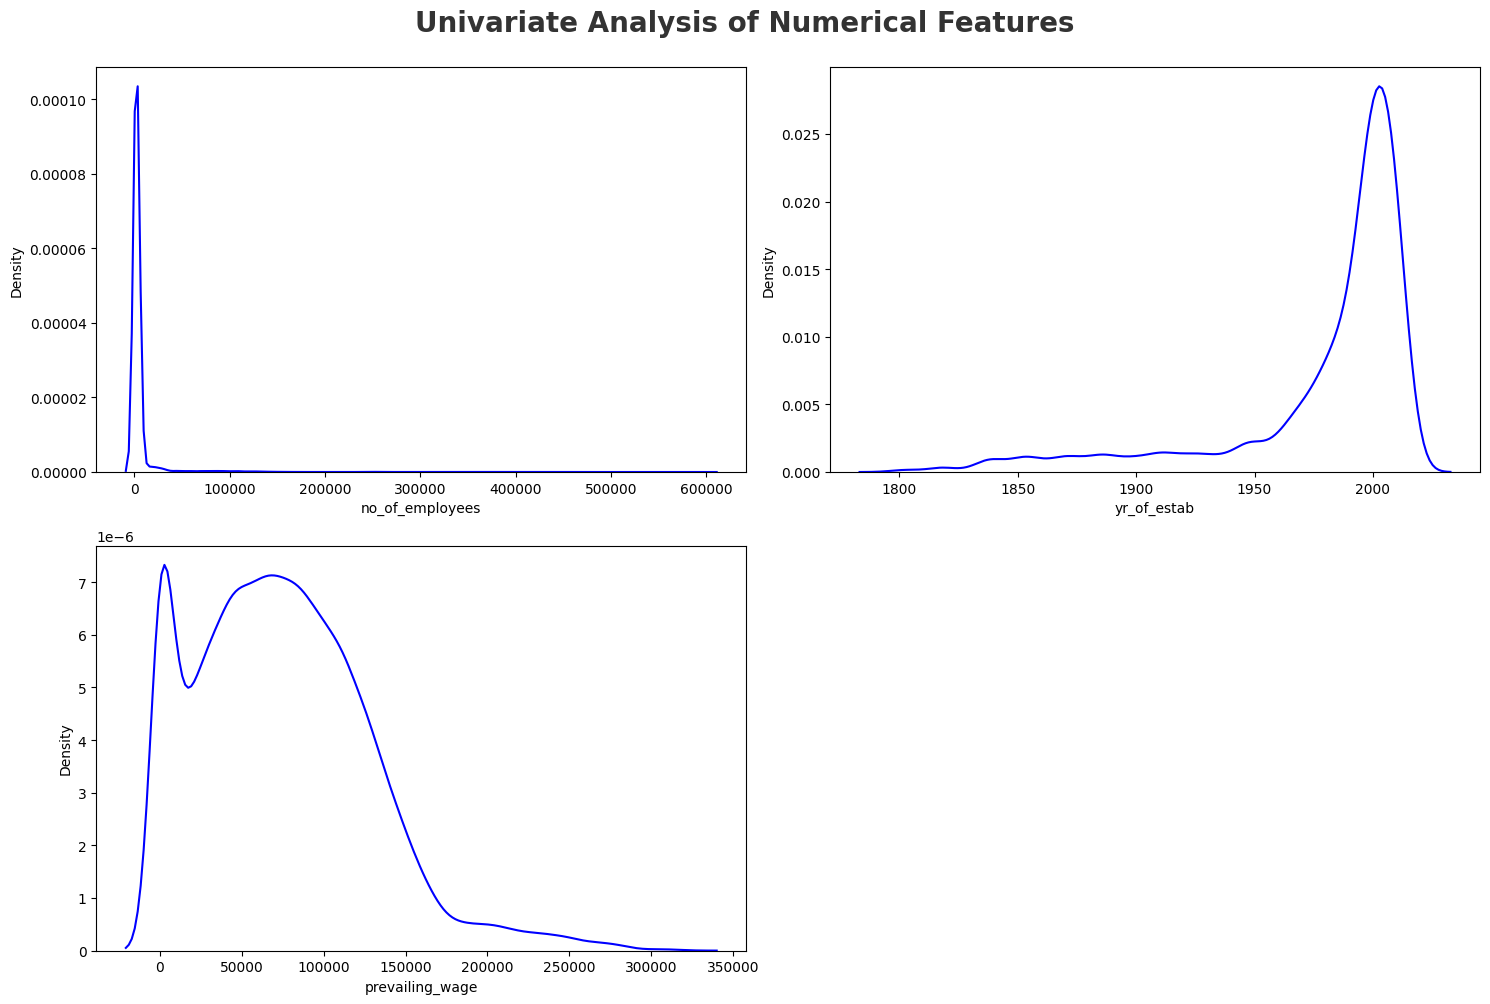

In [8]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Num.png')

### **Univariate Analysis of Numerical Features**

1. **Number of Employees (no_of_employees)**:
   - The density distribution is highest near zero and decreases rapidly as the number of employees increases, with a long tail extending towards higher values.
   - **Insight**: This indicates that most companies have fewer employees, but there are a few companies with a significantly larger number of employees.

2. **Year of Establishment (yr_of_estab)**:
   - The density is relatively low and stable from the year 1800 to around 1950, after which it increases sharply, peaking around the year 2000.
   - **Insight**: The sharp increase after 1950 suggests a boom in company establishments, peaking around the turn of the millennium. This could correlate with global economic growth and industrialization phases.

3. **Prevailing Wage (prevailing_wage)**:
   - The density has a peak at a lower wage value, then decreases, rises again to form a second peak, and finally decreases steadily towards higher wage values.
   - **Insight**: This bimodal distribution indicates there are two common wage ranges—possibly reflecting a split between lower-wage and higher-wage jobs, perhaps delineating different industry sectors or job roles.

### **Summary**:
- **Number of Employees**: Most companies are small, but some are very large.
- **Year of Establishment**: A significant increase in the number of companies established after 1950, peaking around 2000.
- **Prevailing Wage**: Two common wage ranges suggest a diverse job market with distinct lower and higher-paying sectors.

**Categorical Features**

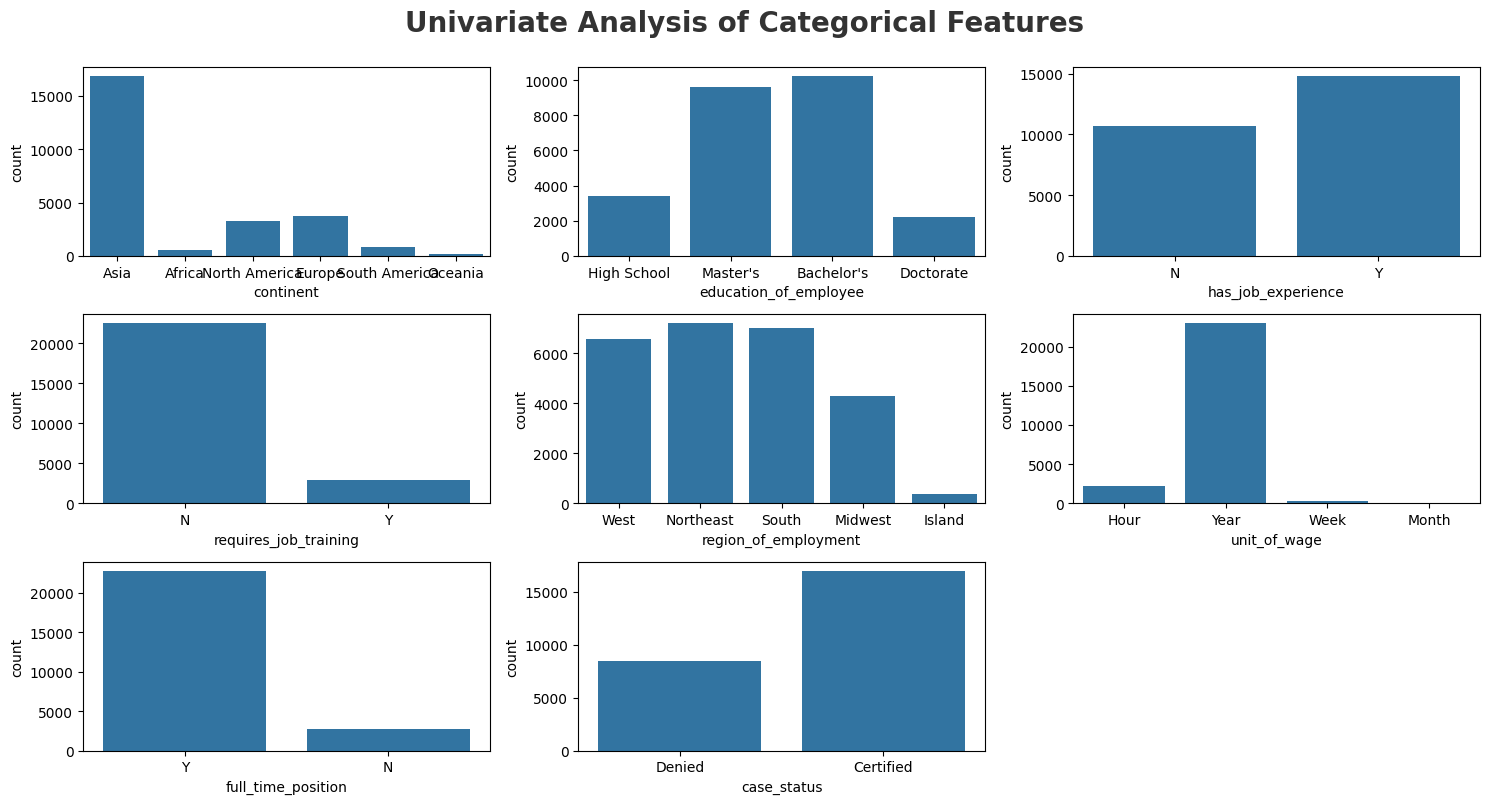

In [9]:
# categorical columns
categorical_features.remove('case_id')
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Cat.png')

### **Continent Representation**:
- **Asia** leads with **66.17%**, indicating a significant portion of employees are from Asia.
- **Europe** follows with **14.65%** and **North America** with **12.92%**, suggesting moderate representation from these regions.
- **South America** has **3.34%**, **Africa** **2.16%**, and **Oceania** is the least represented with **0.75%**.

### **Education Level**:
- **Bachelor's degree** is the most common at **40.16%**.
- **Master's degree** follows closely at **37.81%**.
- **High School education** accounts for **13.42%**.
- **Doctorate** holders make up **8.60%**.

### **Job Experience**:
- **58.09%** of employees have job experience.
- **41.91%** do not have job experience, indicating a slightly higher preference for experienced individuals.

### **Job Training Requirement**:
- A vast majority **(88.40%)** of positions do not require job training.
- **11.60%** of positions require job training, suggesting that most roles prioritize skills and qualifications over training.

### **Region of Employment**:
- The **Northeast** region leads with **28.24%**.
- The **South** region follows closely with **27.54%**.
- The **West** region has **25.85%**.
- The **Midwest** region holds **16.90%**.
- **Island regions** have the lowest representation at **1.47%**.

### **Unit of Wage**:
- **Yearly** wages are the most common at **90.12%**.
- **Hourly** wages account for **8.47%**.
- **Weekly** wages make up **1.07%**.
- **Monthly** wages are the least common at **0.35%**.

### **Full-Time Position**:
- An overwhelming majority **(89.38%)** of positions are full-time.
- Only **10.62%** are part-time positions.

### **Case Status**:
- **66.79%** of cases are certified.
- **33.21%** of cases are denied, indicating that a majority of applications are successful.

---

### **Summary**:
This data indicates that most employees are from Asia, hold a Bachelor's or Master's degree, have job experience, and do not require additional job training. Employment is predominantly in the Northeast, South, and West regions, with wages mostly provided on a yearly basis and full-time positions being the norm. The majority of cases are certified, indicating a high success rate for applications.

**Multivariate Analysis**
- Multivariate analysis is the analysis of more than one variable.

In [10]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 0 discrete features : []

We have 3 continuous_features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


**Check Multicollinearity in Numerical features**

In [11]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**Insights**

- There is no multicollinearity between any variables

**Check Multicollinearity for Categorical features**
- A chi-squared test (also chi-square or $X^2$ test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test.
- A chi-square statistic is one way to show a relationship between two categorical variables.
- Here we test correlation of Categorical columns with Target column i.e case_status

**Null Hypothesis ($H_0$):** The Feature is independent of target column (No-Correlation)

**Alternative Hypothesis ($H_1$):** The Feature and Target column are not independent (Correalted)



In [12]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


**Report:**

- Here `requires_job_training` fails to Rejects Null Hypothesis which means it doesn't correlate with target column.

**Checking Null Values**

In [13]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [14]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


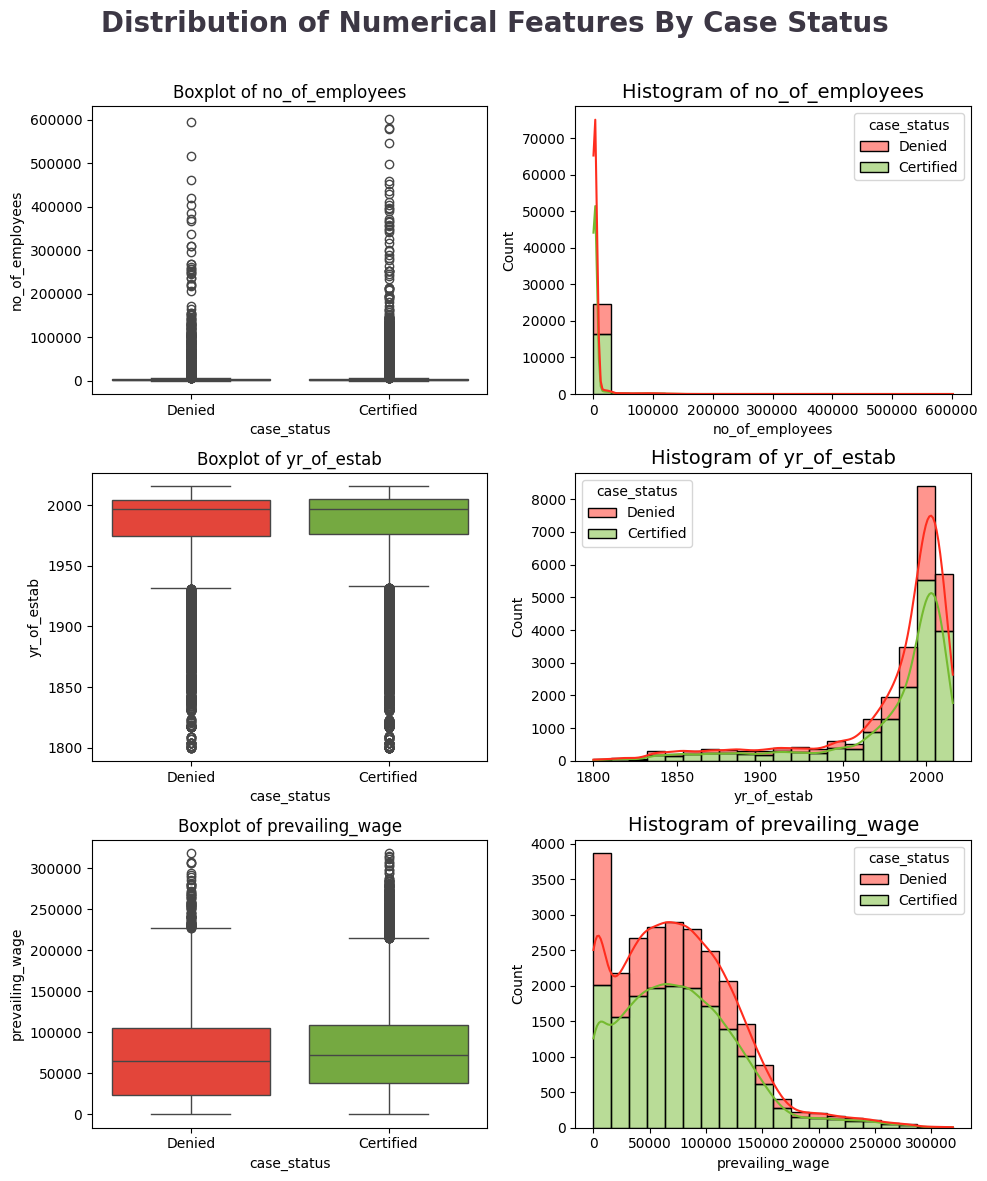

In [15]:
clr1 = ['#ff2d1e', '#75ba30']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By Case Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continues_features):   
    sns.boxplot(data=df, x='case_status', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
# plt.savefig('images/multivariate_num.png')

**Some key insights:**

1. **Boxplot of Number of Employees (no_of_employees)**: Shows the distribution of the number of employees for denied and certified cases. Both categories have a large number of outliers, with the bulk of the data concentrated at lower values.

2. **Histogram of Number of Employees (no_of_employees)**: Displays the distribution of the number of employees for denied and certified cases. Most of the data is concentrated at lower values, with a long tail extending to higher values.

3. **Boxplot of Year of Establishment (yr_of_estab)**: Depicts the distribution of the year of establishment for denied and certified cases. Both categories have similar distributions, with most data points concentrated around the mid-1900s to early 2000s.

4. **Histogram of Year of Establishment (yr_of_estab)**: Shows the distribution of the year of establishment for denied and certified cases. The data shows a peak around the late 1900s to early 2000s.

5. **Boxplot of Prevailing Wage (prevailing_wage)**: Displays the distribution of the prevailing wage for denied and certified cases. Both categories have a large number of outliers, with the bulk of the data concentrated at lower values.

6. **Histogram of Prevailing Wage (prevailing_wage)**: Shows the distribution of the prevailing wage for denied and certified cases. The data shows a peak at lower wage values, with a long tail extending to higher values.

### Insights:

1. **Number of Employees**: Both denied and certified cases show a concentration of companies with fewer employees, but there are some large companies, as indicated by the long tail and outliers.

2. **Year of Establishment**: Most companies were established around the mid-1900s to early 2000s, indicating a period of significant growth and establishment of companies during this timeframe.

3. **Prevailing Wage**: The prevailing wage has a bimodal distribution, suggesting two common wage ranges, possibly reflecting different job roles or industry sectors.


### 4. Visualization

**4.1 Visualize the Target Feature**

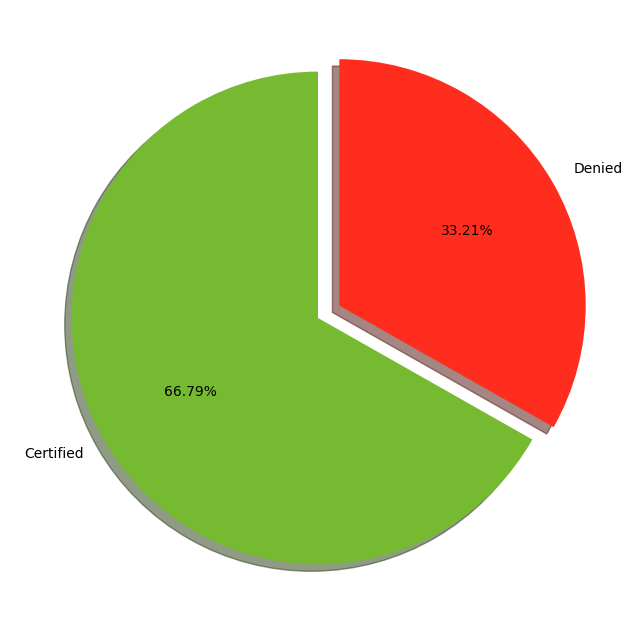

In [16]:
percentage = df.case_status.value_counts(normalize=True)*100
labels = ["Certified","Denied"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#75ba30','#ff2d1e']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

- **Certified**: Representing **66.79%**.
- **Denied**: Representing **33.21%**.

This visual representation highlights the success rate of applications, with a significant majority (over two-thirds) being certified. This insight suggests a high approval rate for applications overall.

**4.2 Does applicant Continent has any impact on Visa status?**

In [17]:
#group data by continent and their count of case_status
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

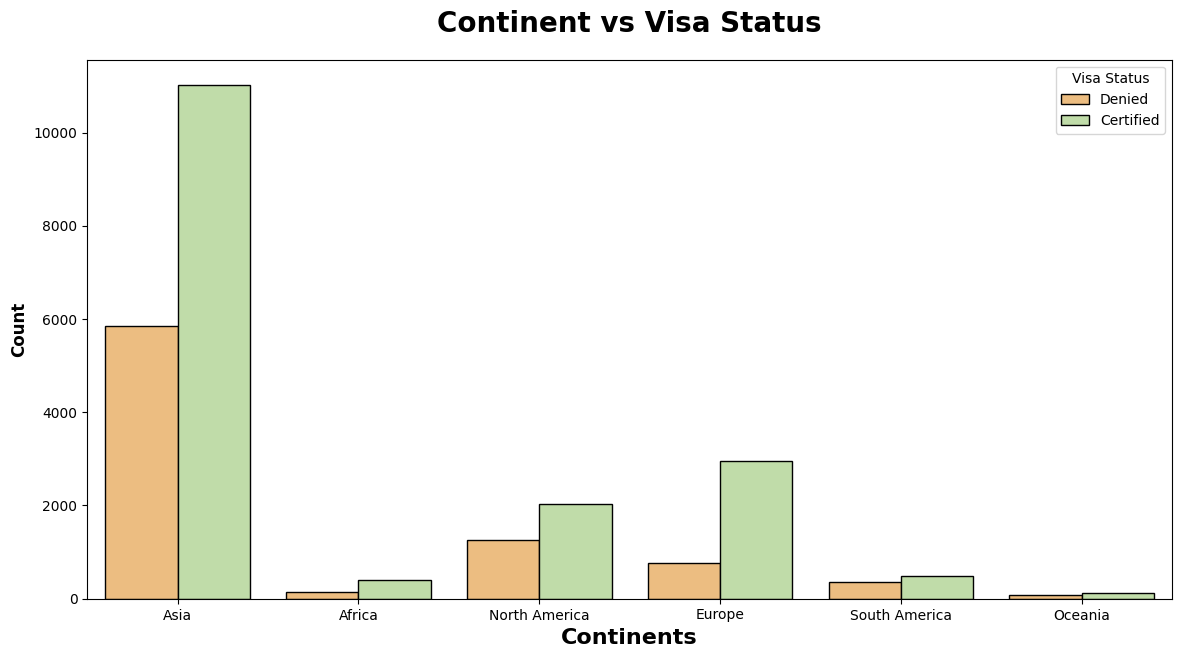

In [18]:
plt.subplots(figsize=(14,7))
sns.countplot(x="continent",hue="case_status", data=df, ec = "black",palette="Spectral")
plt.title("Continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Continents", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

In [19]:
df2 = df.copy()

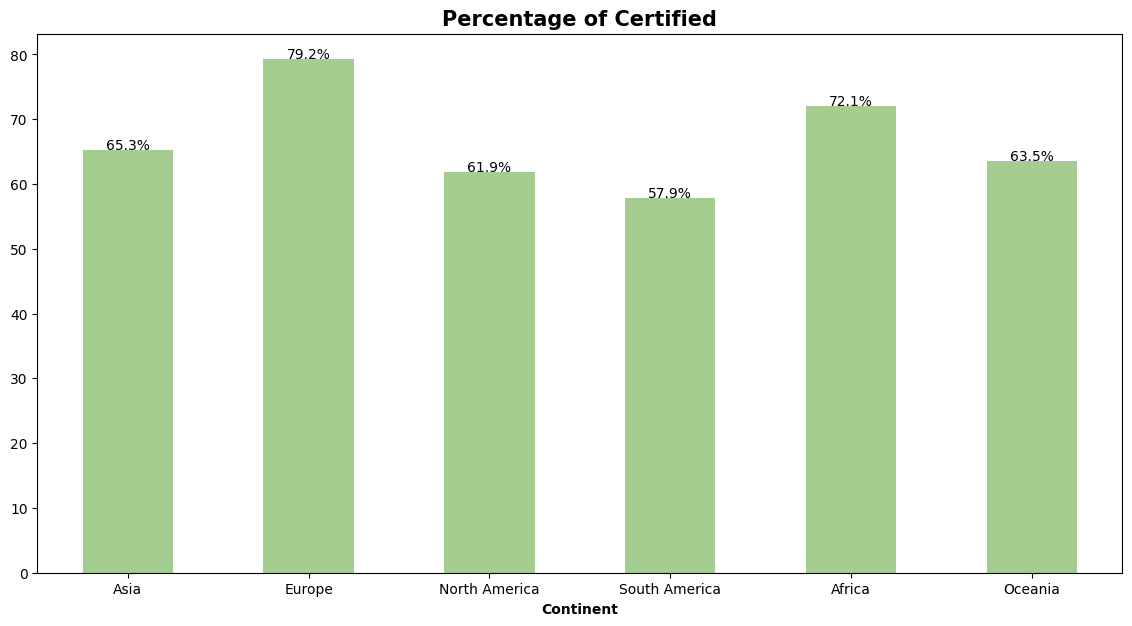

In [20]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts()).plot(
    kind='bar',stacked=True , colormap='crest')
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Continent' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

### **Percentage of Certified Individuals Across Continents**

- **Asia**: 65.3%
- **Europe**: 79.2%
- **North America**: 61.9%
- **South America**: 57.9%
- **Africa**: 72.1%
- **Oceania**: 63.5%

### **Insights**:

1. **Europe** has the highest percentage of certified individuals at **79.2%**, suggesting a favorable environment for certifications in this continent.
2. **Africa** follows with **72.1%**, indicating a significant proportion of certified individuals.
3. **Asia** and **Oceania** have similar certification rates, both in the **60s percentile**.
4. **North America** has a slightly lower certification rate compared to Asia and Oceania.
5. **South America** has the lowest certification rate at **57.9%**, indicating potential challenges in achieving certifications.

### **Summary**:
The data indicates varying certification rates across continents, with Europe leading and South America trailing. These insights could inform strategies for improving certification rates in underperforming regions or highlight successful practices in high-performing areas.


**4.3 Does applicant education has any impact on Visa status?**

In [21]:
#group data by Education and their count of case_status
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

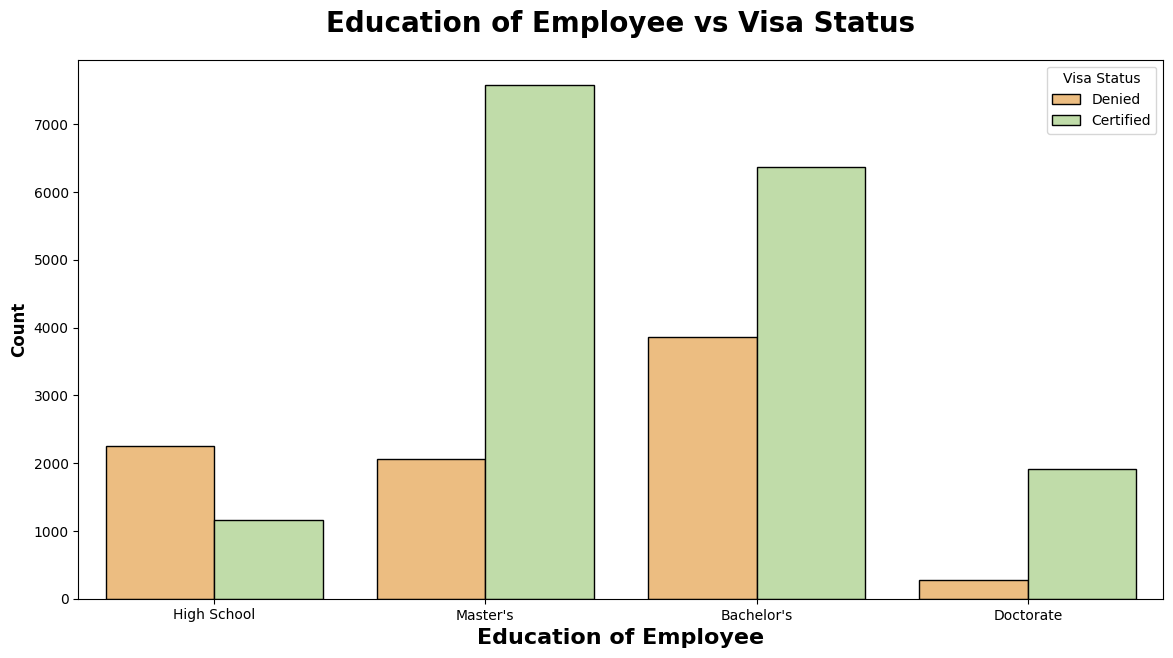

In [22]:
plt.subplots(figsize=(14,7))
sns.countplot(x="education_of_employee",hue="case_status", data=df, ec = "black",palette="Spectral")
plt.title("Education of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Education of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

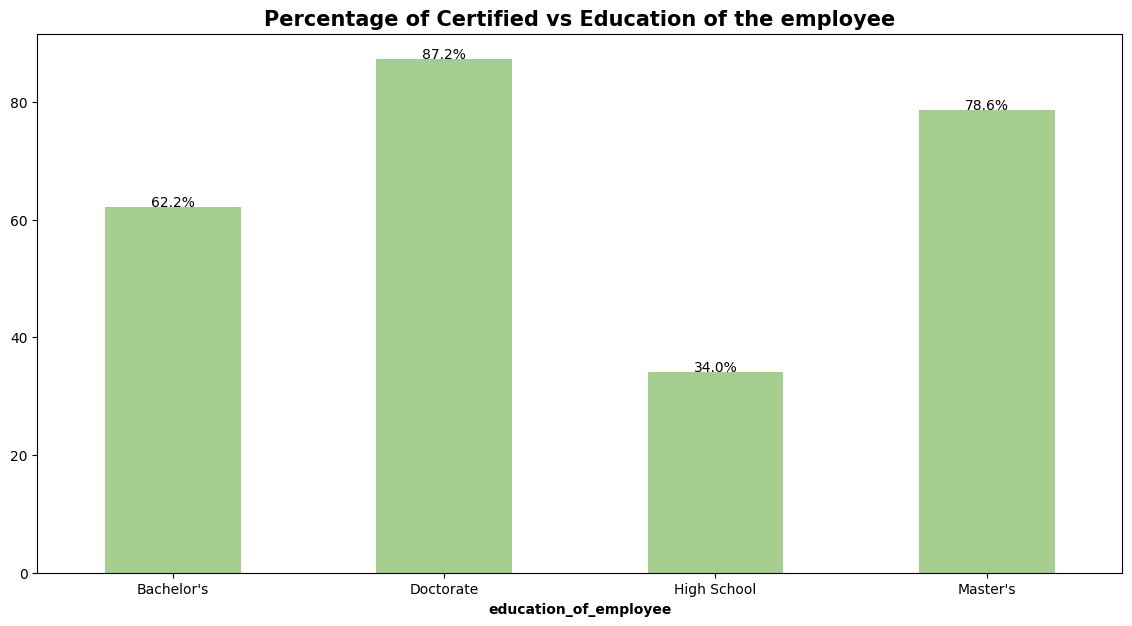

In [23]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts()).plot(
    kind='bar',stacked=True , colormap='crest')
plt.title("Percentage of Certified vs Education of the employee" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('education_of_employee' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

### **Education Levels and Certification Rates**:

1. **Bachelor's Degree**:
   - **62.2%** of employees with a Bachelor's degree are certified.
   - This suggests a substantial portion of Bachelor's degree holders achieve certification.

2. **Doctorate**:
   - **87.2%** of employees with a Doctorate are certified.
   - This is the highest percentage among all education levels, indicating that employees with a Doctorate are most likely to be certified.

3. **High School**:
   - Only **34.0%** of employees with a High School education are certified.
   - This is the lowest percentage, implying that high school graduates face significant challenges in achieving certification.

4. **Master's Degree**:
   - **78.6%** of employees with a Master's degree are certified.
   - This is a high percentage, second only to Doctorate holders, showcasing the importance of advanced education in achieving certification.

### **Key Insights**:

- **Higher Education and Certification**: The data clearly shows a positive correlation between higher education levels and certification rates. Employees with Doctorates and Master's degrees have significantly higher certification rates compared to those with only a High School education.
- **Bachelor's Degree Holders**: While not as high as Doctorate or Master's degree holders, a notable 62.2% of Bachelor's degree holders are certified, indicating that a significant portion still achieves certification.
- **Challenges for High School Graduates**: The low certification rate for High School graduates highlights potential barriers or gaps in opportunities for this group, suggesting a need for additional support or training programs to improve their chances of achieving certification.


**4.4 Does applicant's previous work experience has any impact on Visa status?**

In [24]:
#group data by has_job_experience and count case_status
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

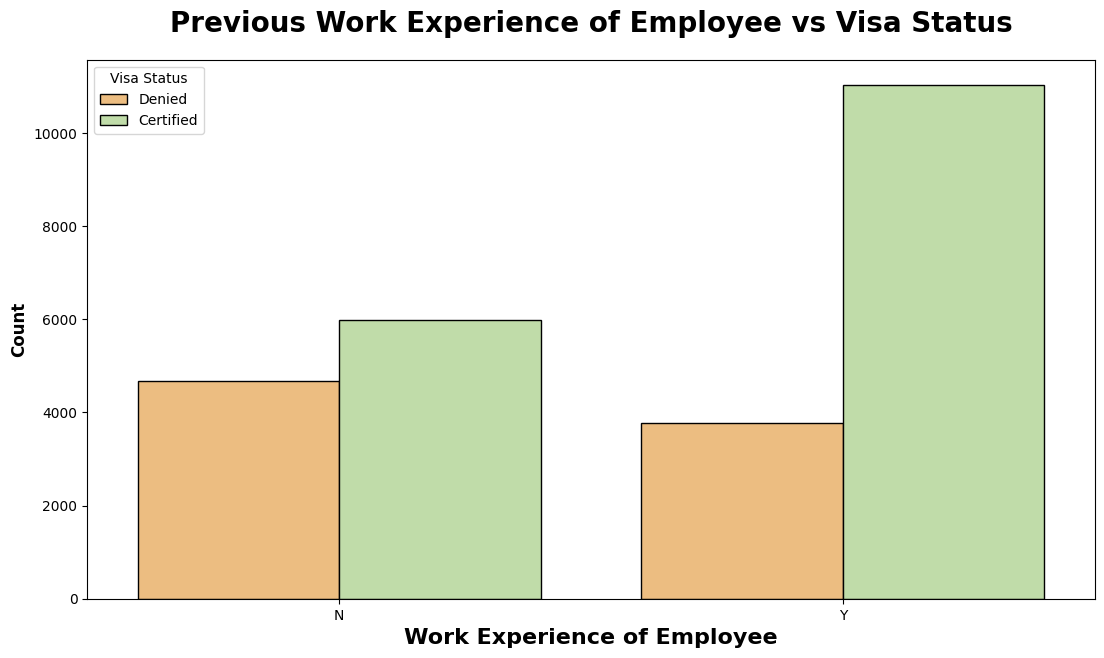

In [25]:
plt.subplots(figsize=(13,7))
sns.countplot(x="has_job_experience",hue="case_status", data=df, ec= "black",palette="Spectral")
plt.title("Previous Work Experience of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Work Experience of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

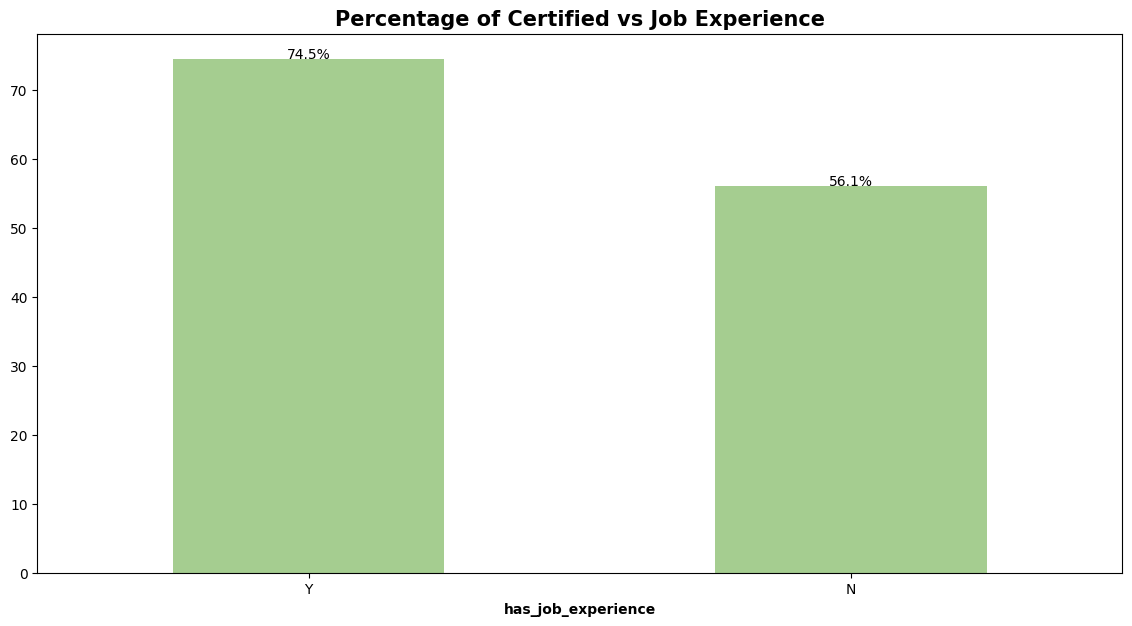

In [26]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts()).plot(
    kind='bar',stacked=True , colormap='crest')
plt.title("Percentage of Certified vs Job Experience" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('has_job_experience' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

#### **Percentage of Certified vs Job Experience**

The bar chart illustrates the percentage of certified individuals based on whether they have job experience or not.

- **With Job Experience**:
  - **74.5%** of individuals with job experience are certified.
  - This high percentage suggests that having job experience significantly increases the likelihood of certification.

- **Without Job Experience**:
  - **56.1%** of individuals without job experience are certified.
  - While still a majority, this is noticeably lower than the certification rate for those with job experience.

#### **Key Insights**:

1. **Value of Job Experience**: The data highlights the importance of job experience in achieving certification. Individuals with job experience have a substantially higher certification rate compared to those without.
  
2. **Potential Barriers**: The lower certification rate for individuals without job experience suggests potential barriers or challenges faced by this group. It could imply that job experience provides not only practical skills but also confidence and competence needed for certification.

3. **Targeted Support**: Organizations aiming to increase certification rates might consider providing additional support, mentorship, or training programs for individuals without job experience to help bridge this gap.

#### **Storytelling**:
Imagine a training institution analyzing its certification rates to identify areas for improvement. This chart provides a clear narrative: candidates with job experience are more likely to be certified, indicating the critical role of real-world experience. The institution could leverage this insight to design targeted interventions for candidates without job experience, such as internships or hands-on training programs, to boost their certification success.


**4.5 If the Employee requires job training, does it make any impact on visa status?**

In [27]:
#group data by requires_job_training and count case_status
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

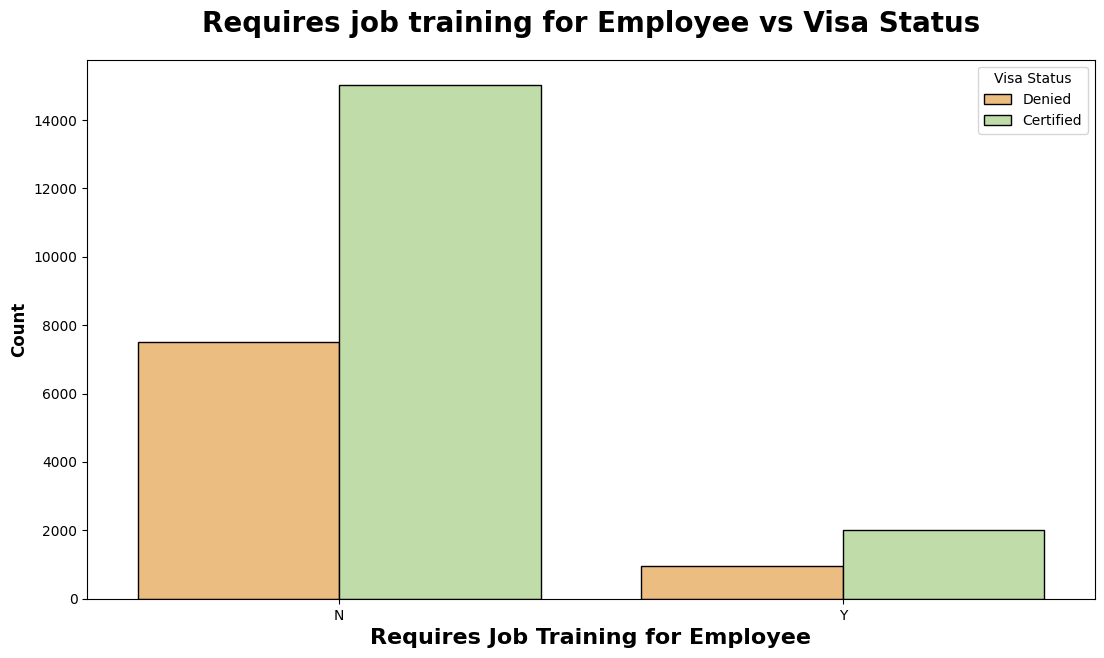

In [28]:
plt.subplots(figsize=(13,7))
sns.countplot(x="requires_job_training",hue="case_status", data=df, ec= "black",palette="Spectral")
plt.title("Requires job training for Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

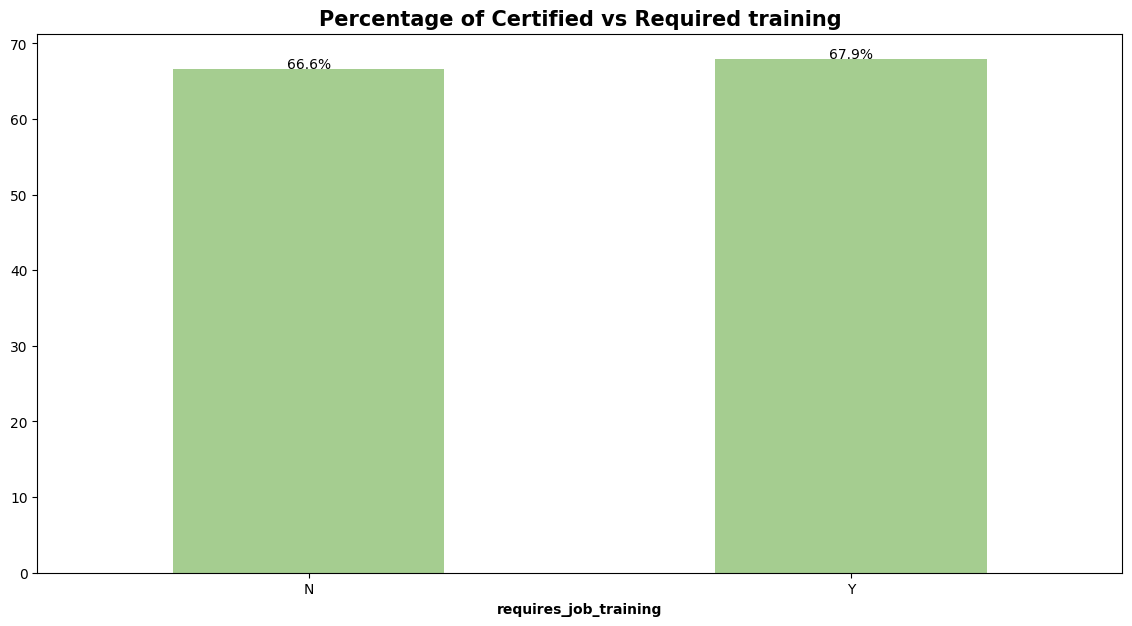

In [29]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts()).plot(
    kind='bar',stacked=True , colormap='crest')
plt.title("Percentage of Certified vs Required training" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('requires_job_training' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

#### **Insights**:

1. **No Job Training Required**:
   - **66.6%** of individuals who do not require job training are certified.
   - This suggests that a significant portion of employees can achieve certification without the need for additional training.

2. **Job Training Required**:
   - **67.9%** of individuals who require job training are certified.
   - Interestingly, the certification rate for those needing job training is slightly higher than for those who do not, suggesting that job training might provide a beneficial impact on certification success.

#### **Key Takeaways**:

- **Importance of Training**: Although the difference is not vast, the slightly higher certification rate for those requiring job training highlights the potential positive impact of training programs on achieving certification.
- **Certification Without Training**: A high percentage of certifications are achieved without job training, indicating that many employees possess the necessary skills and qualifications from the outset.

#### **Storytelling**:
Imagine an organization aiming to optimize its certification rates. This chart provides a key insight: while most employees can achieve certification without additional training, those who do undergo training have a slightly better success rate. This suggests that investing in targeted training programs could help boost certification rates even further, particularly for employees who might need additional support.


**4.6 Does Number of employees of employer has any impact on Visa status?**

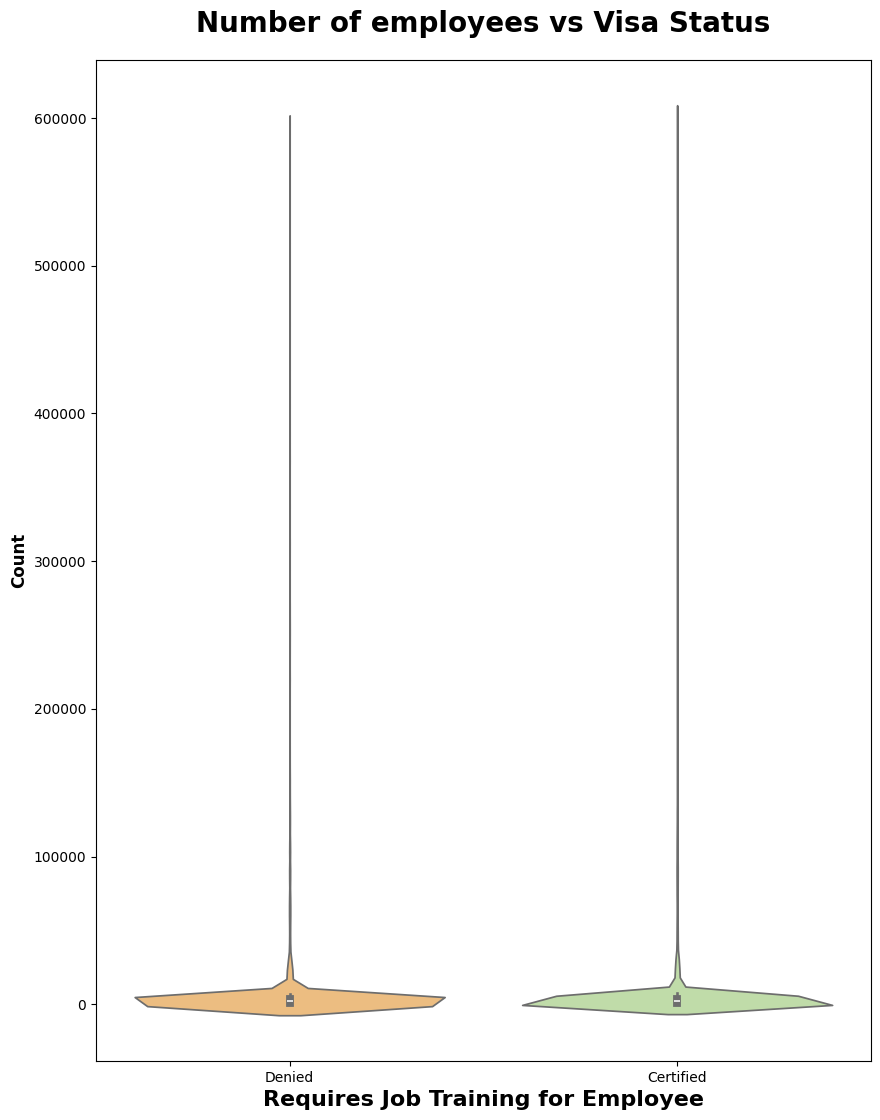

In [30]:
plt.subplots(figsize=(10,13))
sns.violinplot(x="case_status",y='no_of_employees', data=df, palette="Spectral")
plt.title("Number of employees vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.ylim()
plt.show()

**It's a violin plot showing the distribution of the number of employees based on their visa status, specifically whether their visa was denied or certified. Let's dive into the insights:**

#### **Distribution of Employees Based on Visa Status**:

1. **Visa Status**:
    - **Denied**: Represents the employees whose visas were denied.
    - **Certified**: Represents the employees whose visas were certified.

2. **Count Distribution**:
    - The count of employees ranges from 0 to 600,000.
    - For both denied and certified cases, the majority of the data points are concentrated at the lower end of the count range.
    - There is a long tail extending upwards, indicating that there are some companies with a significantly higher number of employees.

#### **Key Insights**:

1. **Concentration of Data**:
    - The plot shows that most companies have fewer employees, as indicated by the high concentration of data points at the lower end of the count range.
    - However, the long tail extending upwards suggests that there are a few companies with a large number of employees.

2. **Comparison Between Denied and Certified Cases**:
    - Both denied and certified categories have similar distributions, with a majority of the data points concentrated at the lower end.
    - There doesn't appear to be a significant difference in the distribution patterns between denied and certified cases.

#### **Storytelling**:
Imagine an organization looking to understand the impact of visa status on the number of employees. This plot reveals that regardless of visa status (denied or certified), most companies have a relatively small number of employees, but there are a few companies with a significantly larger workforce. This insight can help in assessing the overall employee distribution and planning strategies accordingly.


**4.7 Wages and its impact on Visa status**

In [31]:
#group data by unit_of_wage and count the case_status
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True)

unit_of_wage  case_status
Hour          Denied         0.653686
              Certified      0.346314
Month         Certified      0.617978
              Denied         0.382022
Week          Certified      0.621324
              Denied         0.378676
Year          Certified      0.698850
              Denied         0.301150
Name: proportion, dtype: float64

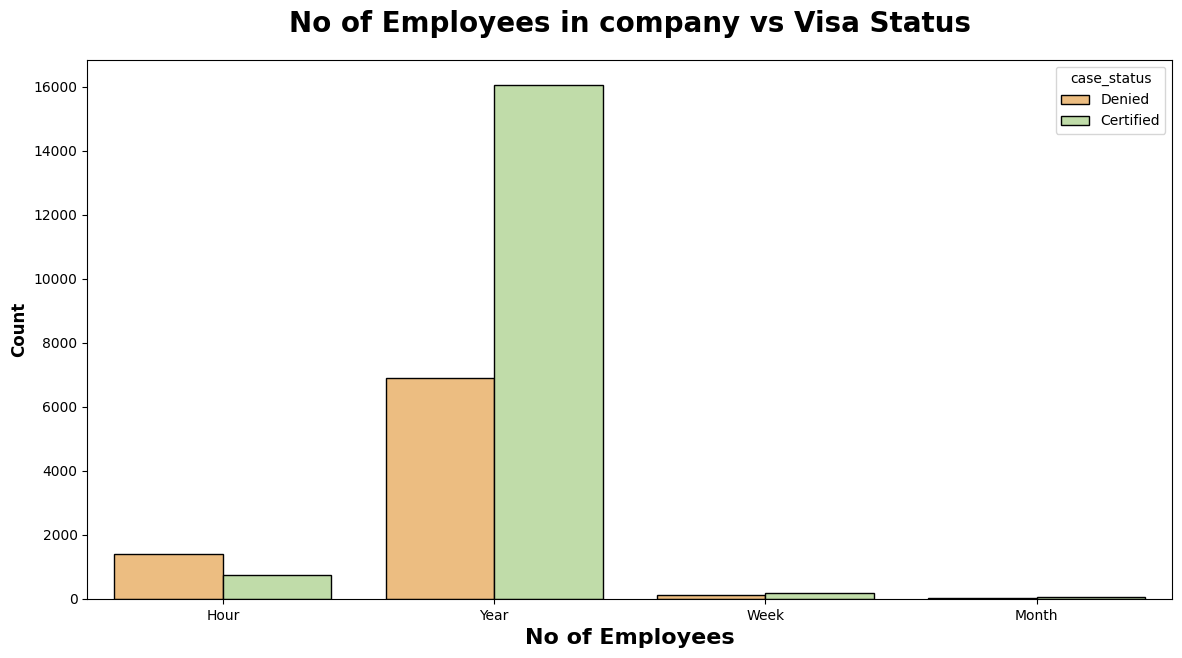

In [32]:
plt.subplots(figsize=(14,7))
sns.countplot(x="unit_of_wage",hue="case_status", data=df,ec='k', palette='Spectral')
plt.title("No of Employees in company vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("No of Employees", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

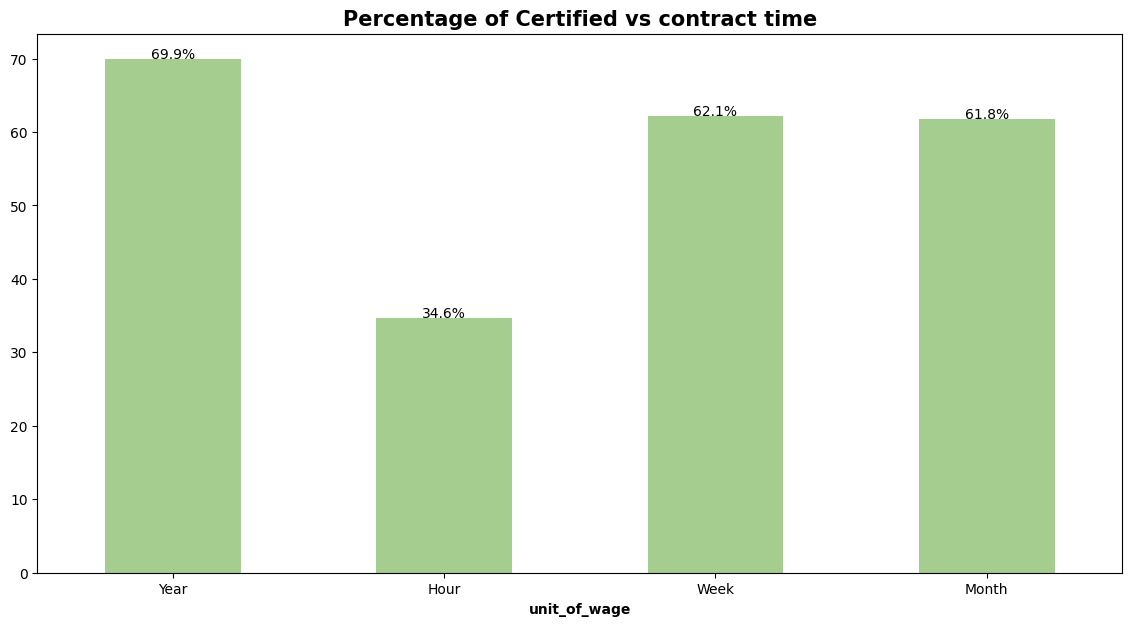

In [33]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts()).plot(
    kind='bar',stacked=True , colormap='crest')
plt.title("Percentage of Certified vs contract time" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('unit_of_wage' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

#### **Insights**:

1. **Yearly Contracts**:
   - **69.9%** of yearly contracts are certified.
   - This is the highest certification rate among all contract time categories, indicating that yearly contracts are more likely to be certified compared to other contract durations.

2. **Hourly Contracts**:
   - **34.6%** of hourly contracts are certified.
   - This is the lowest certification rate, suggesting that hourly contracts face more challenges in achieving certification.

3. **Weekly Contracts**:
   - **62.1%** of weekly contracts are certified.
   - This is a relatively high certification rate, showing that weekly contracts are also favored in terms of certification.

4. **Monthly Contracts**:
   - **61.8%** of monthly contracts are certified.
   - Similar to weekly contracts, monthly contracts have a high certification rate.

#### **Key Takeaways**:

- **Preference for Longer Contracts**: The data clearly shows that longer contracts (yearly) have higher certification rates, suggesting stability and long-term commitments are valued.
- **Challenges for Hourly Contracts**: The significantly lower certification rate for hourly contracts indicates potential barriers or issues specific to short-term or hourly engagements.

#### **Storytelling**:
Imagine a company looking to optimize its contract offerings to improve certification rates. This chart provides a clear direction: focusing on longer-term contracts, such as yearly or even weekly and monthly contracts, can increase the likelihood of certification. Conversely, the lower success rate of hourly contracts suggests a need for additional support or restructuring to boost their certification prospects.


**4.7 Does Region of employment has impact on Visa status?**

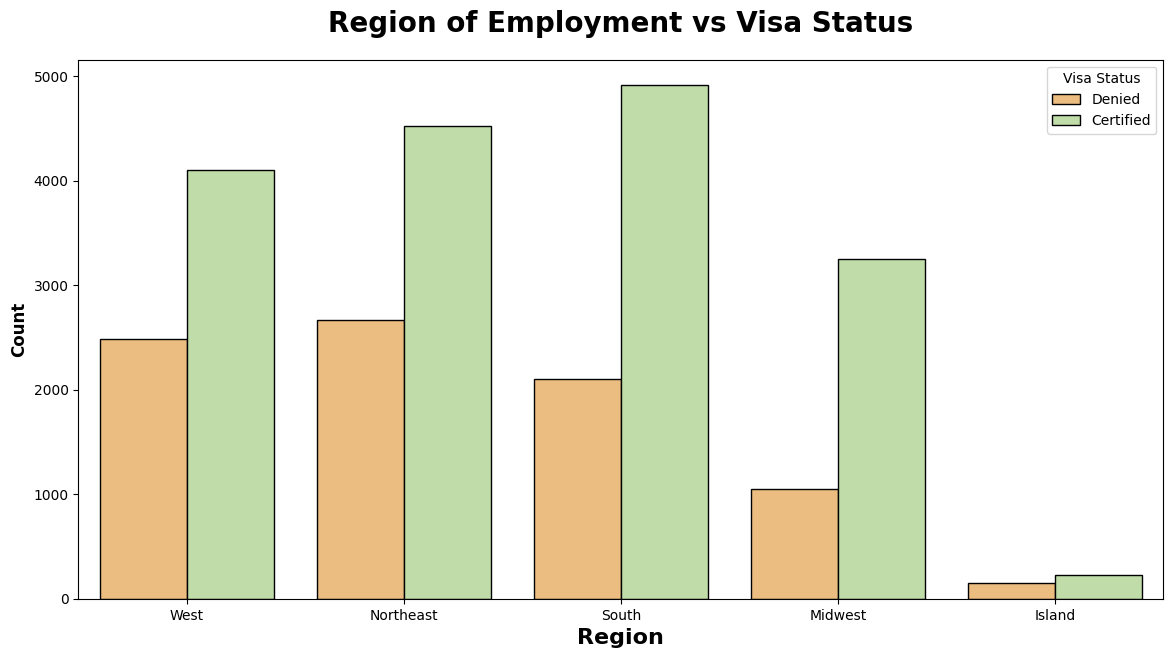

In [34]:
plt.subplots(figsize=(14,7))
sns.countplot(x="region_of_employment",hue="case_status", data=df,ec='k', palette='Spectral')
plt.title("Region of Employment vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

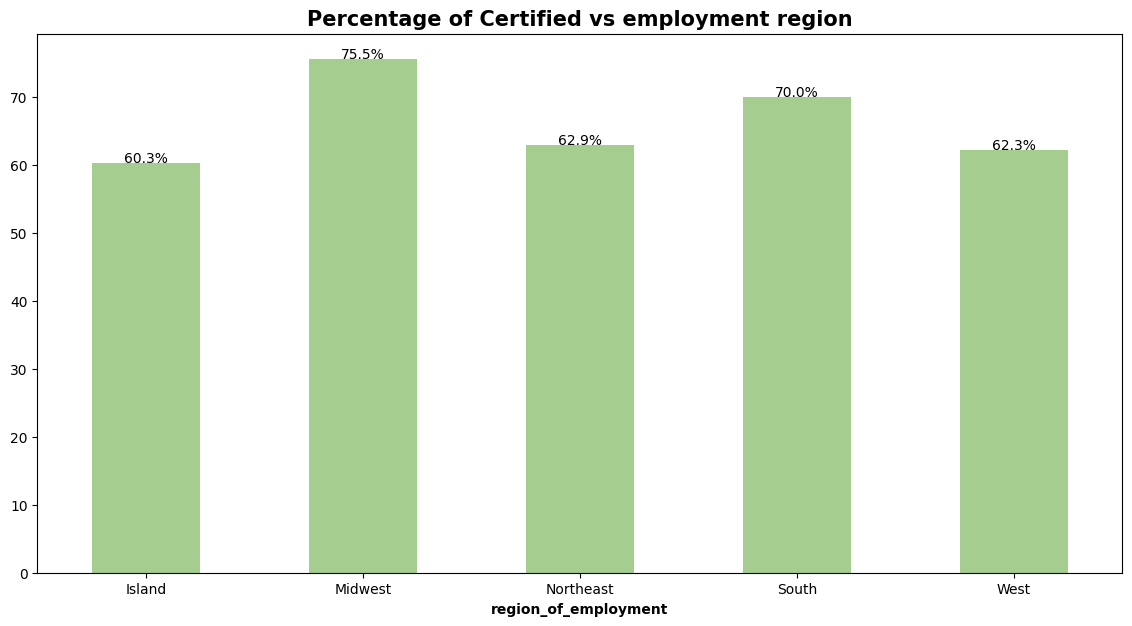

In [35]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts()).plot(
    kind='bar',stacked=True , colormap='crest')
plt.title("Percentage of Certified vs employment region" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('region_of_employment' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

#### **Insights by Region**:

1. **Island**:
   - **60.3%** of individuals are certified.
   - This is the lowest percentage among the regions, suggesting potential challenges in achieving certification in Island regions.

2. **Midwest**:
   - **75.5%** of individuals are certified.
   - The highest certification rate, indicating strong support or favorable conditions for certification in the Midwest.

3. **Northeast**:
   - **62.9%** of individuals are certified.
   - This is slightly above average, showing a moderately high certification rate.

4. **South**:
   - **70.0%** of individuals are certified.
   - A high certification rate, suggesting favorable conditions for certification in the Southern region.

5. **West**:
   - **62.3%** of individuals are certified.
   - This is close to the Northeast's certification rate, indicating similar conditions in these two regions.

#### **Key Takeaways**:

- **Midwest's Strength**: The Midwest stands out with the highest certification rate, indicating strong support systems, favorable policies, or better preparedness among employees in this region.
- **Challenges in Island Regions**: The Island regions have the lowest certification rate, which may point to specific challenges or barriers that need to be addressed.
- **Consistent Performance in Other Regions**: The Northeast, South, and West have relatively high and consistent certification rates, showing that these regions are performing well in terms of employee certification.

#### **Storytelling**:
Imagine an organization looking to understand regional variations in certification rates to optimize their training and support programs. This chart reveals that the Midwest is leading the way, suggesting that best practices from this region could be applied elsewhere. The lower certification rate in Island regions highlights the need for targeted interventions or additional support to improve outcomes.


**4.8 Does Prevailing wage has any impact on Visa status?**

In [36]:
df.groupby('prevailing_wage').case_status.value_counts()

prevailing_wage  case_status
2.1367           Certified      1
2.9561           Denied         1
3.0031           Denied         1
3.3188           Denied         1
3.4889           Certified      1
                               ..
311734.4900      Certified      1
314156.0600      Certified      1
315497.6000      Certified      1
318446.0500      Certified      1
319210.2700      Denied         1
Name: count, Length: 25462, dtype: int64

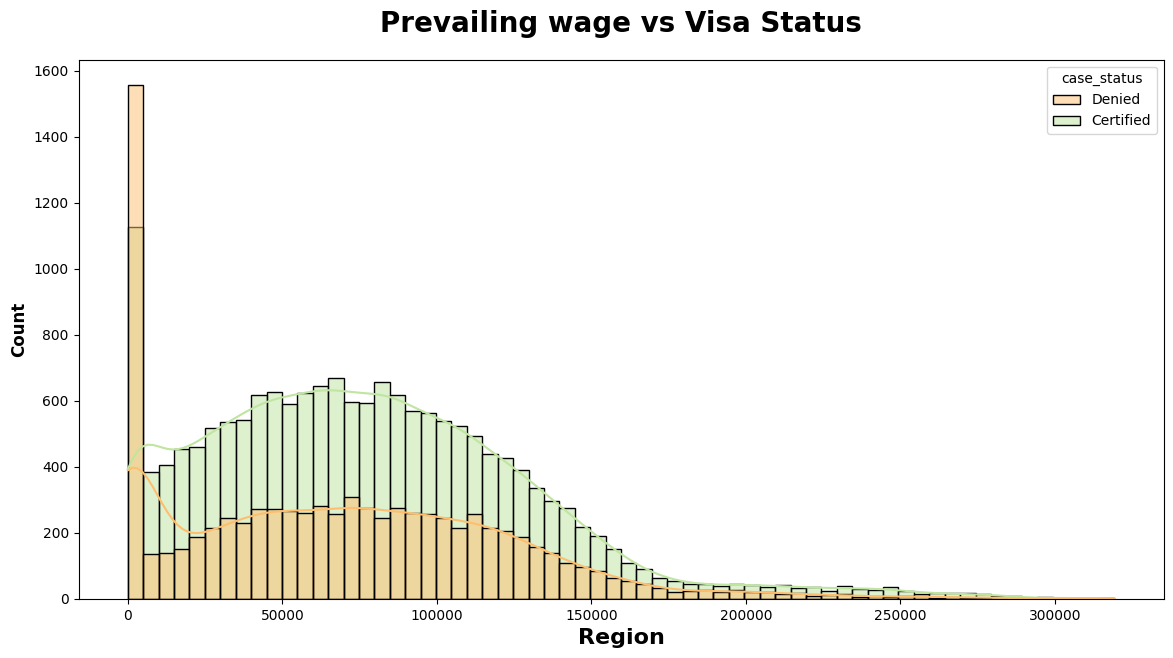

In [37]:
plt.subplots(figsize=(14,7))
sns.histplot(x="prevailing_wage",hue="case_status", data=df, kde=True, palette='Spectral')
plt.title("Prevailing wage vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

#### **Insights from the Histogram:**

1. **Distribution of Wages**:
   - The histogram displays the distribution of prevailing wages for two visa case statuses: Denied and Certified.
   - The x-axis represents the wage amounts, while the y-axis represents the number of cases.

2. **Certified vs. Denied Cases**:
   - **Certified Cases**: Represented in light green, there is a higher concentration of certified cases, especially in the mid-range of wages.
   - **Denied Cases**: Represented in beige, there is a significant number of denied cases, particularly at very low wage levels.

3. **Wage Influence**:
   - The mid-range of wages sees a higher number of certified cases, suggesting that visas are more likely to be certified when the prevailing wages fall within this range.
   - Very low wages tend to have a higher number of denied cases, indicating that lower wage offers might negatively impact the likelihood of visa certification.

#### **Key Takeaways**:

- **Higher Wages and Certification**: The trend shows that as wages increase to a certain mid-range, the likelihood of visa certification also increases.
- **Lower Wages and Denial**: Visa cases associated with lower prevailing wages are more likely to be denied, suggesting that competitive wage offers are crucial for successful visa certification.

#### **Storytelling**:
Imagine a company looking to improve its visa approval rates for foreign employees. This histogram provides a critical insight: offering competitive wages can significantly enhance the likelihood of visa certification. By ensuring that prevailing wages are within a favorable range, companies can increase their chances of securing the necessary visas for their employees.


**4.8.1 Prevailing wage based on Education**

In [38]:
print('Average Prevailing wage based on Employee education')
df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Employee education


,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


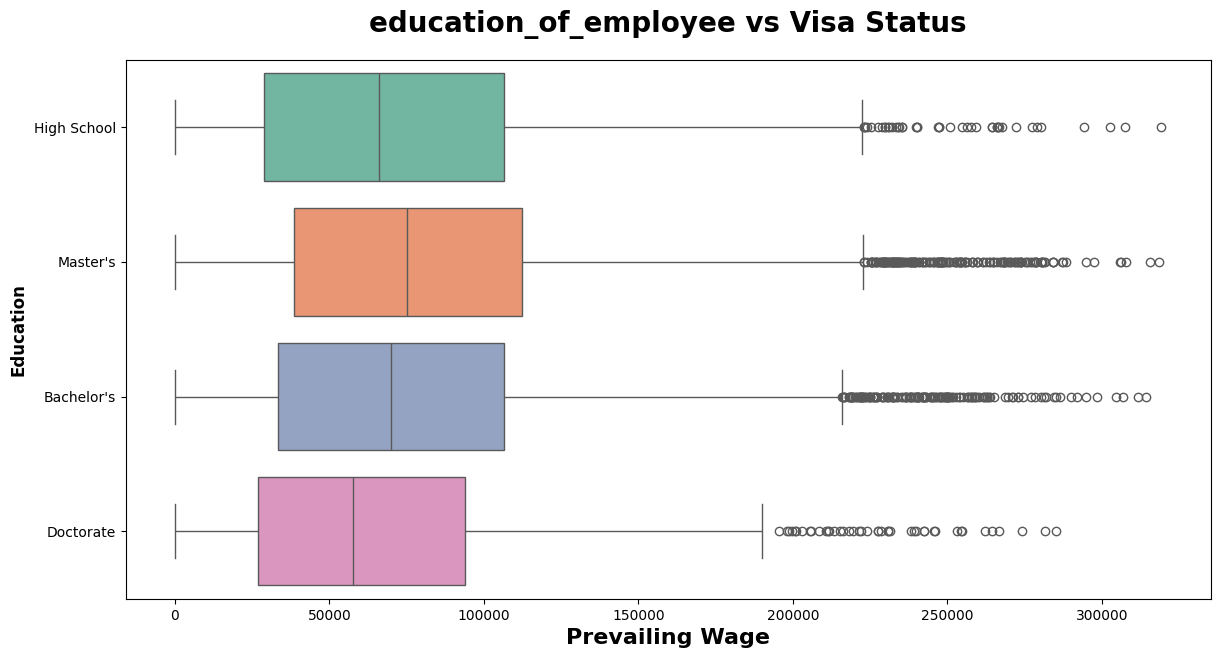

In [39]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="education_of_employee",x = "prevailing_wage", data=df,palette='Set2')
plt.title("education_of_employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("Education", weight="bold", fontsize=12)
plt.show()

#### **Education Levels and Prevailing Wages**:

1. **High School**:
   - The box plot for high school education shows a broad range with a lower median wage.
   - This indicates that employees with only a high school education tend to have lower prevailing wages compared to those with higher education levels.

2. **Bachelor's Degree**:
   - The median wage for employees with a bachelor's degree is higher than that for high school graduates.
   - This suggests that having a bachelor's degree generally leads to higher prevailing wages.

3. **Master's Degree**:
   - Employees with a master's degree have an even higher median wage compared to those with a bachelor's degree.
   - This highlights the value of advanced education in securing higher wages.

4. **Doctorate**:
   - The box plot for doctorate holders shows the highest median wage among all education levels.
   - This indicates that employees with a doctorate degree tend to earn the highest wages.

#### **Insights on Visa Status**:

- The distribution of prevailing wages is consistent across different education levels for both denied and certified visa statuses.
- However, the median wages for certified visa holders tend to be higher than those for denied cases, indicating that higher wages might increase the likelihood of visa approval.

#### **Key Takeaways**:

- **Value of Education**: Higher education levels correlate with higher prevailing wages. Employees with advanced degrees (master's and doctorate) tend to earn more compared to those with only a high school education or bachelor's degree.
- **Impact on Visa Status**: Higher prevailing wages are associated with a greater likelihood of visa certification. This suggests that offering competitive wages can improve the chances of securing visas for employees.

#### **Storytelling**:
Imagine an organization looking to optimize its hiring strategy to improve visa approval rates and ensure competitive salaries. This chart provides a clear narrative: investing in employees with higher education levels not only secures a more skilled workforce but also enhances the likelihood of visa certification through competitive wages.


**4.8.2 Prevailing wage based on Job experience**

In [40]:
print('Median Prevailing wage based on Job experience')
df.groupby('has_job_experience')['prevailing_wage'].median().to_frame().sort_values(by='prevailing_wage',ascending=False)

Median Prevailing wage based on Job experience


,prevailing_wage
has_job_experience,
N,72602.290
Y,69033.665


**Report:**

- Suprisingly people who has less job experience has more prevailing wage.
- No job experience applicant has median prevailing wage as 72k USD.
- Previous job experience applicant has median prevailing wage as 69K USD.


**4.8.3 Prevailing wage based on Continent**

In [41]:
print('Average Prevailing wage based on Continent')
df.groupby('continent')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Continent


,prevailing_wage
continent,
Asia,79543.021780
Africa,77425.923450
Oceania,75994.276719
North America,68066.319257
South America,60209.575314
Europe,59842.925899


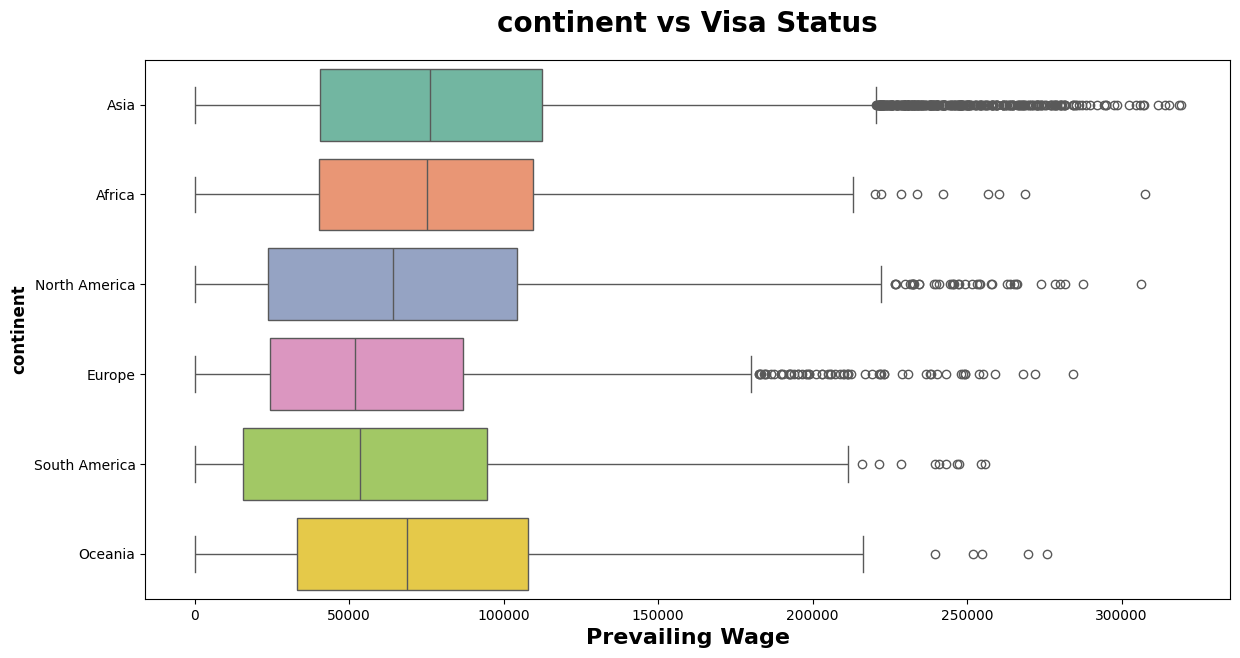

In [42]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="continent",x = "prevailing_wage", data=df,palette='Set2')
plt.title("continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("continent", weight="bold", fontsize=12)
plt.show()

#### **Continent vs. Prevailing Wage**:

1. **Asia**:
   - The median wage is relatively lower compared to other continents.
   - There is a wide range of wages, with several outliers indicating higher-paying jobs.

2. **Africa**:
   - The median wage is lower than in many other continents.
   - There is a considerable range of wages, with some high-paying outliers.

3. **North America**:
   - The median wage is higher compared to Asia and Africa.
   - The distribution shows a narrower range, suggesting more consistency in wages.

4. **Europe**:
   - Europe shows a higher median wage, comparable to North America.
   - The range of wages is broader, indicating variability in job types and industries.

5. **South America**:
   - The median wage is lower, with a range of wages similar to Africa and Asia.
   - There are fewer high-paying outliers compared to other continents.

6. **Oceania**:
   - Oceania has a median wage comparable to North America and Europe.
   - The range of wages is relatively narrow, suggesting consistency in the wage distribution.

#### **Key Insights**:

- **Higher Median Wages in Developed Regions**: North America, Europe, and Oceania tend to have higher median wages compared to Asia, Africa, and South America. This indicates a disparity in wage levels, possibly reflecting differences in economic development, industry presence, and living costs.
  
- **Wage Variability**: Asia, Africa, and Europe show a broad range of wages, suggesting diversity in job roles and industries. This can indicate varying levels of economic opportunities and job market conditions within these continents.

- **Consistency in Wages**: North America and Oceania exhibit a more consistent wage distribution, with fewer outliers. This might reflect more standardized pay structures or a concentration in specific high-paying industries.

#### **Storytelling**:

Imagine an international organization looking to understand wage disparities across different continents to inform their global salary structures and hiring strategies. This plot provides crucial insights into how wages vary, highlighting the need for tailored compensation packages that reflect local economic conditions and job market dynamics.

By focusing on these trends, the organization can develop fair and competitive wage policies that attract and retain talent while addressing regional disparities.


**4.9 Year of Establishment**

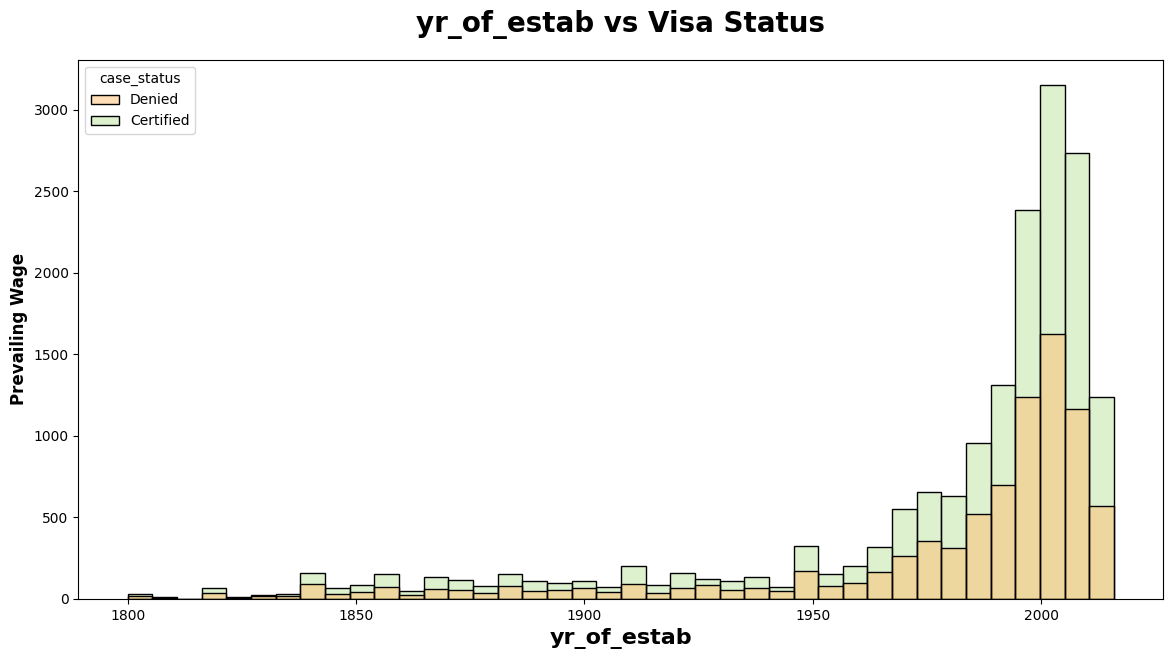

In [43]:
plt.subplots(figsize=(14,7))
sns.histplot(x = "yr_of_estab", data=df, palette='Spectral', bins=40, hue='case_status')
plt.title("yr_of_estab vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("yr_of_estab", weight="bold", fontsize=16)
plt.ylabel("Prevailing Wage", weight="bold", fontsize=12)
plt.show()

#### **Key Insights**:

1. **Increase in Visa Cases Over Time**:
   - The chart indicates a significant increase in the number of visa cases, both certified and denied, particularly after the year 2000.
   - This trend highlights the growing number of visa applications in recent years, reflecting an increase in global mobility and international hiring.

2. **Prevailing Wage Analysis**:
   - The chart suggests a correlation between the year of establishment and the prevailing wage.
   - Older companies (established in the 1800s to mid-1900s) show lower prevailing wages, while more recent companies (established after 2000) show higher prevailing wages.
   - This could indicate that newer companies are offering more competitive wages, possibly to attract international talent.

3. **Visa Status Comparison**:
   - Both certified and denied cases follow a similar trend with an increasing number of applications over time.
   - However, there seems to be a slight difference in the prevailing wages for certified and denied cases, with certified cases generally showing higher wages.
   - This suggests that higher prevailing wages may increase the likelihood of visa certification.

#### **Summary**:
The data reveals a clear trend of increasing visa applications over the years, particularly after 2000, with newer companies offering higher prevailing wages. The correlation between higher wages and visa certification highlights the importance of competitive compensation in securing visas for international employees.

#### Final Report:
- `case_id` column can be dropped as it is an ID.
- `requires_job_training` column can be dropped as it doesn't have much impact on target variable, Proved in visualization and chi2 test.
- `no_of_employees`, `prevailing_wage` columns have outllier which should be handled.
- `continent` columns has few unique values with very less count, which can be made as **others**
- Target column `case_status` is imbalanced can be handled before model building.

###### ---------------------- Feature Engineering and Model Training in Next Notebook --------------------------